# Aula 7 - Modelo Linear Genérico, codificação de variáveis e moderação/mediação

## Modelo Linear Genérico (GLM)

Estrutura matemática utilizada em muitas análises estatísticas, incluindo Regressão Múltipla e ANOVA (normalmente representada como uma análise diferente, embora - na realidade - seja regressão múltipla).

Características:

**Linear**: pares de variáveis que (acredita-se) possuirem uma relação linear.
**Aditivo**: se um conjunto de variáveis prevê outra variável, os efeitos são considerados como aditivos.

MAS, isso *não elimina a necessidade do teste de efeitos causados por não linearidade ou não aditividade*. 

Permite a configuração de diversos testes:

**Transformação de Variáveis**: transformar variáveis não lineares para lineares
**Análises de moderação**: *simulação de um falso GLM* para testar efeitos não aditivos.



Modelo de Regressão Linear simples = Modelo de one-way ANOVA:
**Ŷ = B0 + B1X + Ɛ (erro aleatório)**

- Ŷ = valor previsto para a variável de resposta Y
- B0 = interseção (previsão do valor de Y quando X = 0)
- B1 = coeficiente de regressão (inclinação da reta);
- X  = variável de previsão (nominal em anova)

Modelo de Regressão Múltipla = Modelo de ANOVA fatorial:

Ŷ = B0 + B1X1 + B2X2 + B3X3 + ... + BkXk  + Ɛ 

**Ŷ = B0 + ∑(BkXk)**

- Ŷ = valor previsto para a variável de resposta Y
- B0 = previsão do valor de Y quando X = 0
- Xk  = variáveis de previsão (nominais em ANOVA fatorial)
- Bk = coeficientes de regressão não padronizados
- Y – Ŷ = residuais (erro de predição)
- K = número de variáveis de previsão

Análise de Variância - ANOVA:
Adequado quando os preditores (variáveis independentes) são **categóricas** e o resultado (variável dependente) é **contínua**.

A aplicação mais comum é para a análise de dados de experimentos randomizados, principalmente aqueles que geram mais de duas médias.

Quando somente 2 médias são geradas, utiliza-se testes-t.


In [1]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import linregress

## Codificação de variáveis

Sistema de codificação de **preditores categoricos** em análises de regressão.
**Binário**: pode-se codificar diretamente na coluna como '0' (categoria padrão) e '1' (categoria de comparação).
**Três categorias ou mais**: pode-se criar uma coluna para cada categoria (exceto uma, que será a padrão) e codificar de algumas maneiras:
- **Codificação fictícia**: '1' (efeito presente) ou '0' (efeito ausente).
- **Codificação de efeito sem pesos**: '-1' para a categoria padrão e '1' (efeito presente) ou '0' (efeito ausente). Esta codificação 'zera' cada coluna resultando no efeito de cada categoria sem o efeito da categoria padrão, mas não leva em consideração a diferença de amostragem de cada categoria. Bom quando todas as categorias tem o mesmo peso (n de observações).
- **Codificação de efeitos com pesos**: 
-- Categoria padrão: -Ncat da coluna/N da categoria padrão.
-- Para cada categoria: Ncat/Ncat padrão (quando presente) e '0' quando ausente.

## Moderação 

Podemos dizer que uma variável 'X' é moderada por uma segunda variável 'Z' quando a **inclusão da interação entre as duas resulta em uma melhora no modelo de regressão**. Isso acontece quando a relação entre as variáveis X e Y varia como uma função de Z, ou seja, **não é linear ao longo de 'Z'**.


In [ ]:
# Exemplo sem interação (linear ao longo de Z)

In [ ]:
# Exemplo com interação (não linear ao longo de Z)

# Atividade

### Parte 01: Análise de Moderação

In [9]:
# Ler base de dados
threats = pd.read_excel('../data/iq_threats.xlsx')

Uma pesquisa experimental investiga os efeitos de ameaças de estereotipo em testes de inteligência.
- A variável dependente (Y) é o escore no teste de inteligência.
- A variável independente é a condição de tratamento (3 níveis: controle, ameaça explícita e ameaça implícita).
- A variável de Moderação é o escore em tarefa de memória de trabalho.

Tamanho da amostra N=150 (n=50).

\** a condição experimental é categórica, e já possui uma codificação fictícia: 
- Grupo de controle = referência
- D1 = Ameaça Explícita
- D2 = Ameaça Implícita

In [10]:
# Verifique as colunas dos dados
threats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject      150 non-null    int64  
 1   condition    150 non-null    object 
 2   IQ           150 non-null    int64  
 3   WM           150 non-null    int64  
 4   WM.centered  150 non-null    float64
 5   D1           150 non-null    int64  
 6   D2           150 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 8.3+ KB


In [11]:
#Vizualize as estatísticas de sumário 
threats.describe().round(2)

,subject,IQ,WM,WM.centered,D1,D2
count,150.00,150.00,150.00,150.00,150.00,150.00
mean,75.50,66.02,99.08,0.00,0.33,0.33
std,43.45,27.78,18.37,18.37,0.47,0.47
min,1.00,21.00,55.00,-44.08,0.00,0.00
25%,38.25,44.25,86.00,-13.08,0.00,0.00
50%,75.50,58.50,96.50,-2.58,0.00,0.00
75%,112.75,81.00,111.00,11.92,1.00,1.00
max,150.00,141.00,159.00,59.92,1.00,1.00


In [13]:
# Verifique a correlação entre as Variáveis
cor = threats.corr().round(2)
cor

/tmp/ipykernel_52752/2306592302.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = threats.corr().round(2)


,subject,IQ,WM,WM.centered,D1,D2
subject,1.00,-0.71,-0.16,-0.16,-0.00,0.82
IQ,-0.71,1.00,0.34,0.34,-0.35,-0.46
WM,-0.16,0.34,1.00,1.00,0.07,-0.19
WM.centered,-0.16,0.34,1.00,1.00,0.07,-0.19
D1,-0.00,-0.35,0.07,0.07,1.00,-0.50
D2,0.82,-0.46,-0.19,-0.19,-0.50,1.00


Há um efeito de Ameaça de estereótipo? 

Teste fazendo um modelo
- Regressão linear Múltipla prevendo IQ à partir das condições de ameaça D1 e D2 (QI / D1+D2).

In [14]:
# Regressão Linear Múltipla IQ / D1 + D2:
IQ_S = smf.ols('IQ ~ D1 + D2', data=threats).fit()
print(IQ_S.params)
print(IQ_S.summary())

Intercept    97.88
D1          -45.72
D2          -49.86
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.88e-36
Time:                        20:12:34   Log-Likelihood:                -628.72
No. Observations:                 150   AIC:                             1263.
Df Residuals:                     147   BIC:                             1272.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [15]:
# Regressão Linear Múltipla IQ / D1 + D2:
IQ_S = smf.glm('IQ ~ D1 + D2', data=threats).fit()
print(IQ_S.params)
print(IQ_S.summary())

Intercept    97.88
D1          -45.72
D2          -49.86
dtype: float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                     IQ   No. Observations:                  150
Model:                            GLM   Df Residuals:                      147
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          261.18
Method:                          IRLS   Log-Likelihood:                -628.72
Date:                Mon, 31 Oct 2022   Deviance:                       38393.
Time:                        20:12:45   Pearson chi2:                 3.84e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8583
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

RESPOSTA (interpretação das análises acima): 

Sim, há efeito da ameaça de estereótipo. Isso pode ser visto nos coeficientes de regressão das duas condições de ameaça (ambos significativos) e no modelo (R2=0.67) e significância do mesmo (p<.01).

Há efeito de moderação da Memória de trabalho no tipo de ameaça?

Teste (Modelo_1) para efeitos primários das variáves:
- Regressão Linear Múltipla de IQ / WM+D1+D2.

Teste (Modelo 2) para efeitos de moderação:
- Regressão Linear Múltipla de IQ / WM+D1+D2+**WM\*D1+WM\*D2**.

In [16]:
# Teste (Modelo_1) para efeitos primários das variáveis
Modelo_1 = smf.ols('IQ ~ WM + D1 + D2', threats).fit()
print(Modelo_1.params)
print(Modelo_1.summary())

Intercept    59.786350
WM            0.372809
D1          -45.205523
D2          -46.907351
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.08e-40
Time:                        20:13:05   Log-Likelihood:                -614.24
No. Observations:                 150   AIC:                             1236.
Df Residuals:                     146   BIC:                             1249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [17]:
# Teste (Modelo_2) para efeitos de moderação
Modelo_2 = smf.ols('IQ ~ WM + D1 + D2 + WM*D1 + WM*D2', threats).fit()
print(Modelo_2.params)
print(Modelo_2.summary())

Intercept    85.585112
WM            0.120326
D1          -93.095177
D2          -79.897025
WM:D1         0.471639
WM:D2         0.328772
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     82.35
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           1.78e-40
Time:                        20:13:20   Log-Likelihood:                -609.67
No. Observations:                 150   AIC:                             1231.
Df Residuals:                     144   BIC:                             1249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

In [18]:
# Comparando os modelos 1 e 2 acima:
from statsmodels.stats.api import anova_lm

mod_compare = anova_lm(Modelo_1, Modelo_2)
print(mod_compare)

   df_resid           ssr  df_diff      ss_diff         F    Pr(>F)
0     146.0  31655.041707      0.0          NaN       NaN       NaN
1     144.0  29783.712093      2.0  1871.329614  4.523806  0.012433


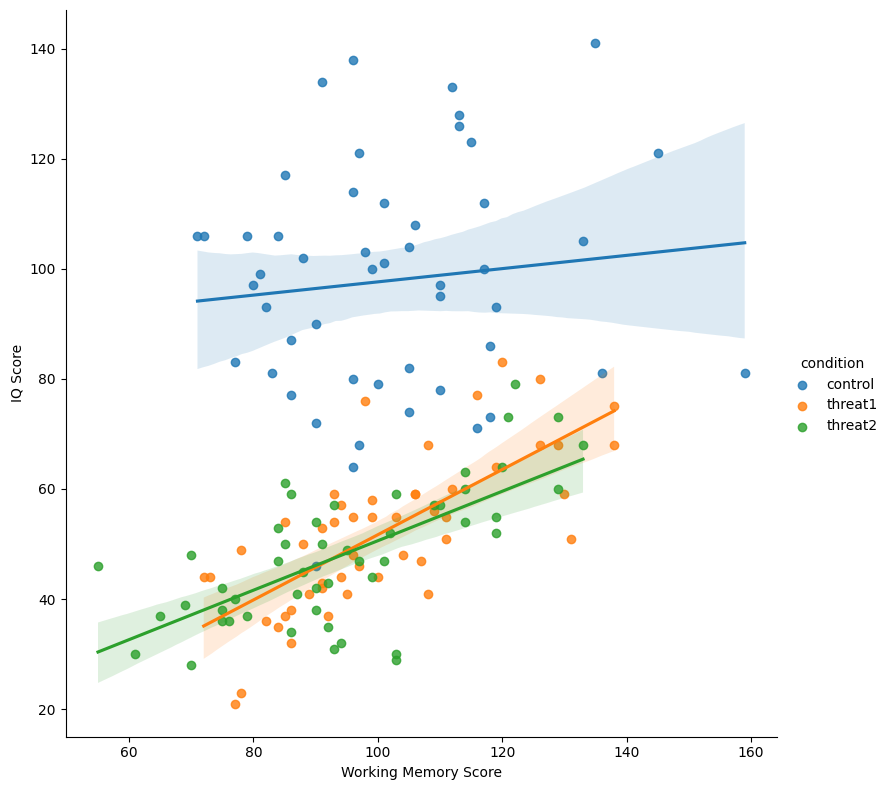

In [19]:
# Gráfico de Dispersão por condição
graph = sns.lmplot( data=threats, x='WM', y='IQ', hue='condition', height=8)
# Nomeação dos eixos
graph.set_axis_labels('Working Memory Score', 'IQ Score')
plt.show()

Com base na interpretação dos modelos acima, responda: 

- 1. O 'Modelo_2' desempenha melhor que o 'Modelo_1'? Elabore.

- 2. O coeficiente de regressão das variáveis de moderação (produtos) são significativos? O que isso significa? Elabore.

- 3. Há moderação da ameaça? Elabore.

R1. Em valores absolutos sim, embora ambos os modelos sejam bem similares. O modelo 1 apresenta todos os coeficientes de regressão com validade estatística, enquanto o modelo 2 tem o coeficiente de regressão de 'Working Memory' não significativo, mas as interações são significativas, indicando moderação da variável em questão.

R2. Sim. Que a variável 'Ameaça (Threat)' não varia de maneira linear ao longo de 'WM'.

R3. Sim. O modelo melhora com a inclusão da interação entre variáveis. Isso pode ser confirmado na comparação de modelos que mostra uma diferença estatisticamente significante (p<.01).

### Parte 02: Análise de Mediação

Uma pesquisa experimental investiga os efeitos de ameaças de estereotipo em testes de inteligência.
- A variável dependente (Y) é o escore no teste de inteligência.
- A variável independente (X) é a condição de tratamento (2 níveis: controle, ameaça)
- A variável de mediação (M) é o escore em tarefa de memória de trabalho.

Tamanho da amostra N=100 (n=50).

In [ ]:
# Ler base de dados
Threat = pd.read_excel('/content/drive/MyDrive/!UFSM/Analise_Estatistica/dataset/IQ_Threat_WM.xlsx')

In [ ]:
# Vizualize as estatísticas de sumário (por condição de tratamento)
Threat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    100 non-null    int64 
 1   condition  100 non-null    object
 2   IQ         100 non-null    int64 
 3   WM         100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


Analise o efeito de mediação através de 3 modelos de regressão linear:
- Mod_01 (Y~X) - IQ / Condição
- Mod_02 (Y~X+M) - IQ / Condição + WM
- Mod_03 (M~X) - WM / condição

In [ ]:
# Mod_01 (Y~X) - IQ / Condição
Mod_1 = smf.ols('IQ ~ condition', data=Threat).fit()
print(Mod_1.params)
print(Mod_1.summary())

Intercept              97.32
condition[T.threat]   -11.00
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     14.11
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           0.000293
Time:                        23:55:06   Log-Likelihood:                -409.27
No. Observations:                 100   AIC:                             822.5
Df Residuals:                      98   BIC:                             827.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [ ]:
# Mod_02 (Y~X+M) - IQ / Condição + WM
Mod_2 = smf.ols('IQ ~ condition + WM', data=Threat).fit()
print(Mod_2.params)
print(Mod_2.summary())

Intercept              55.997696
condition[T.threat]    -2.407489
WM                      0.752409
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     IQ   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           3.27e-17
Time:                        00:24:16   Log-Likelihood:                -376.86
No. Observations:                 100   AIC:                             759.7
Df Residuals:                      97   BIC:                             767.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------

In [ ]:
# Mod_03 (M~X) - WM / condição
Mod_3 = smf.ols('WM ~ condition', data=Threat).fit()
print(Mod_3.params)
print(Mod_3.summary())

Intercept              54.92
condition[T.threat]   -11.42
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     WM   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     18.05
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           4.91e-05
Time:                        00:24:47   Log-Likelihood:                -400.71
No. Observations:                 100   AIC:                             805.4
Df Residuals:                      98   BIC:                             810.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

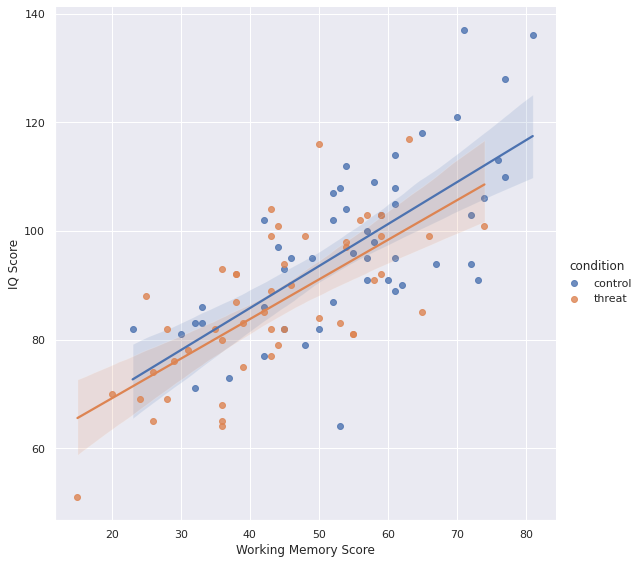

In [ ]:
# Gráfico de Dispersão por condição
graph2 = sns.lmplot( data=Threat, x='WM', y='IQ', hue='condition', height=8)
# Nomeação dos eixos
graph2.set_axis_labels('Working Memory Score', 'IQ Score')
plt.show()


Compare as estatísticas de sumário de cada modelo e responda: há mediação da memória de trabalho?

Sim, Há mediação TOTAL de memória de trabalho. Isso porque, após a inserção da variável WM no modelo, o efeito da ameaça deixou de ser significativo. Além disso, um modelo de predição de 'WM' à partir da condição de ameaça pode ser feito. 

# Referências:

[The General Linear Model](https://statsthinking21.github.io/statsthinking21-python/13-GeneralLinearModel.html)

[Generalized Linear Models - Statsmodels Documentation](https://www.statsmodels.org/stable/glm.html)

[6 Ways to Encode Features for Machine Learning Algorithms](https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0)

[O que é Modelagem de Equações Estruturais?](https://statplace.com.br/blog/modelagem-de-equacoes-estruturais/)
